## 1. 라이브러리 & 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [3]:
df_Card = pd.read_csv('./CARD_SPENDING_RESIDENT.txt',sep='\t',engine='python',encoding='cp949')
df_Deli = pd.read_excel('./2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx',sheet_name='Sheet1',encoding='cp494')
df_Combi1 = df_Card.copy()
df_Combi2 = df_Deli.copy()

## 2. 데이터 전처리

### 2.1 신한카드 데이터 정리하기

In [4]:
df_Combi1.head(5)

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [5]:
df_Combi1 = df_Combi1.drop(['USE_CNT','SEX_CD','AGE_CD'],axis=1)
df_Combi1['YEAR'] = df_Combi1['STD_DD'].map(lambda x:str(x)[0:4])
df_Combi1['YE_MO'] = df_Combi1['STD_DD'].map(lambda x:str(x)[0:6])
df_Combi1.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,USE_AMT,YEAR,YE_MO
0,20190201,110,517,10,595,2019,201902
1,20190201,110,517,10,243,2019,201902
2,20190201,110,517,10,27,2019,201902
3,20190201,110,517,10,243,2019,201902
4,20190201,110,517,10,433,2019,201902


### {{ 1. 중구 }} GU_CD : 140

In [6]:
df_Combi1_SJ = df_Combi1[df_Combi1['GU_CD']==140].drop(['STD_DD'],axis=1)
df_Combi1_SJ

,GU_CD,DONG_CD,MCT_CAT_CD,USE_AMT,YEAR,YE_MO
1656,140,520,10,1038,2019,201902
1657,140,520,10,4635,2019,201902
1658,140,520,10,3046,2019,201902
1659,140,520,10,5995,2019,201902
1660,140,520,10,5172,2019,201902
...,...,...,...,...,...,...
2531944,140,680,81,948,2020,202005
2531945,140,680,81,1059,2020,202005
2531946,140,680,81,1666,2020,202005
2531947,140,680,81,644,2020,202005


In [183]:
df_Combi1_SJ['DONG_CD'].unique()

array([520, 540, 550, 570, 580, 590, 605, 615, 625, 635, 645, 650, 665,
       670, 680], dtype=int64)

#### [ 1. 520 ] : 서울 중구 소공동

In [8]:
df_Combi1_SJ520 = df_Combi1_SJ[df_Combi1_SJ['DONG_CD']==520]
df_Combi1_SJ

,GU_CD,DONG_CD,MCT_CAT_CD,USE_AMT,YEAR,YE_MO
1656,140,520,10,1038,2019,201902
1657,140,520,10,4635,2019,201902
1658,140,520,10,3046,2019,201902
1659,140,520,10,5995,2019,201902
1660,140,520,10,5172,2019,201902
...,...,...,...,...,...,...
2531944,140,680,81,948,2020,202005
2531945,140,680,81,1059,2020,202005
2531946,140,680,81,1666,2020,202005
2531947,140,680,81,644,2020,202005


In [249]:
SJ520 = df_Combi1_SJ520.pivot_table(index=['YEAR','YE_MO','MCT_CAT_CD','DONG_CD','GU_CD'],values='USE_AMT',aggfunc='sum').reset_index()
SJ520_19 = SJ520[SJ520['YEAR']=='2019']
SJ520_20 = SJ520[SJ520['YEAR']=='2020'].append({'YEAR' : '2020', 'YE_MO' : '202003','MCT_CAT_CD' : 43, 'USE_AMT' : 0 ,'DONG_CD':520,'GU_CD':140},ignore_index=True)
print(SJ520_19.shape)
print(SJ520_20.shape)

(84, 6)
(84, 6)


* 계산식 : (SJ520_20['USE_AMT']-SJ520_19['USE_AMT']) / SJ520_19['USE_AMT'] * 100
            올해 업종 매출액 - 작년 업종 매출액 / 해당 산업 규모 기준 ( = 작년 매출액 )

In [250]:
# 마지막에 추가된 것 때문에 다시 reset_index()를 해야한다
SJ520_20 = SJ520_20.sort_values(['YE_MO','MCT_CAT_CD']).reset_index().drop('index',axis=1)
df_Combi_SJ520_Result= SJ520_19.drop(['YEAR','USE_AMT'],axis=1).copy()
df_Combi_SJ520_Result['Subtract'] = (SJ520_20['USE_AMT']-SJ520_19['USE_AMT']) / SJ520_19['USE_AMT'] * 100
df_Combi_SJ520_Result['MO']=SJ520_19['YE_MO'].map(lambda x : str(x)[4:6])
df_Combi_SJ520_Result = df_Combi_SJ520_Result.sort_values(['MCT_CAT_CD','MO']).reset_index().drop(['YE_MO','index'],axis=1)

In [251]:
df_Combi_SJ520_Result[df_Combi_SJ520_Result['MO']=='02']

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO
0,10,520,140,-25.040192,02
4,20,520,140,60.866135,02
8,21,520,140,-6.113241,02
12,22,520,140,-43.337800,02
16,30,520,140,-91.727053,02
20,32,520,140,611.219081,02
24,33,520,140,-10.476309,02
28,34,520,140,-17.847751,02
32,35,520,140,-2.452557,02
36,40,520,140,-23.502187,02


(-150, 1500)

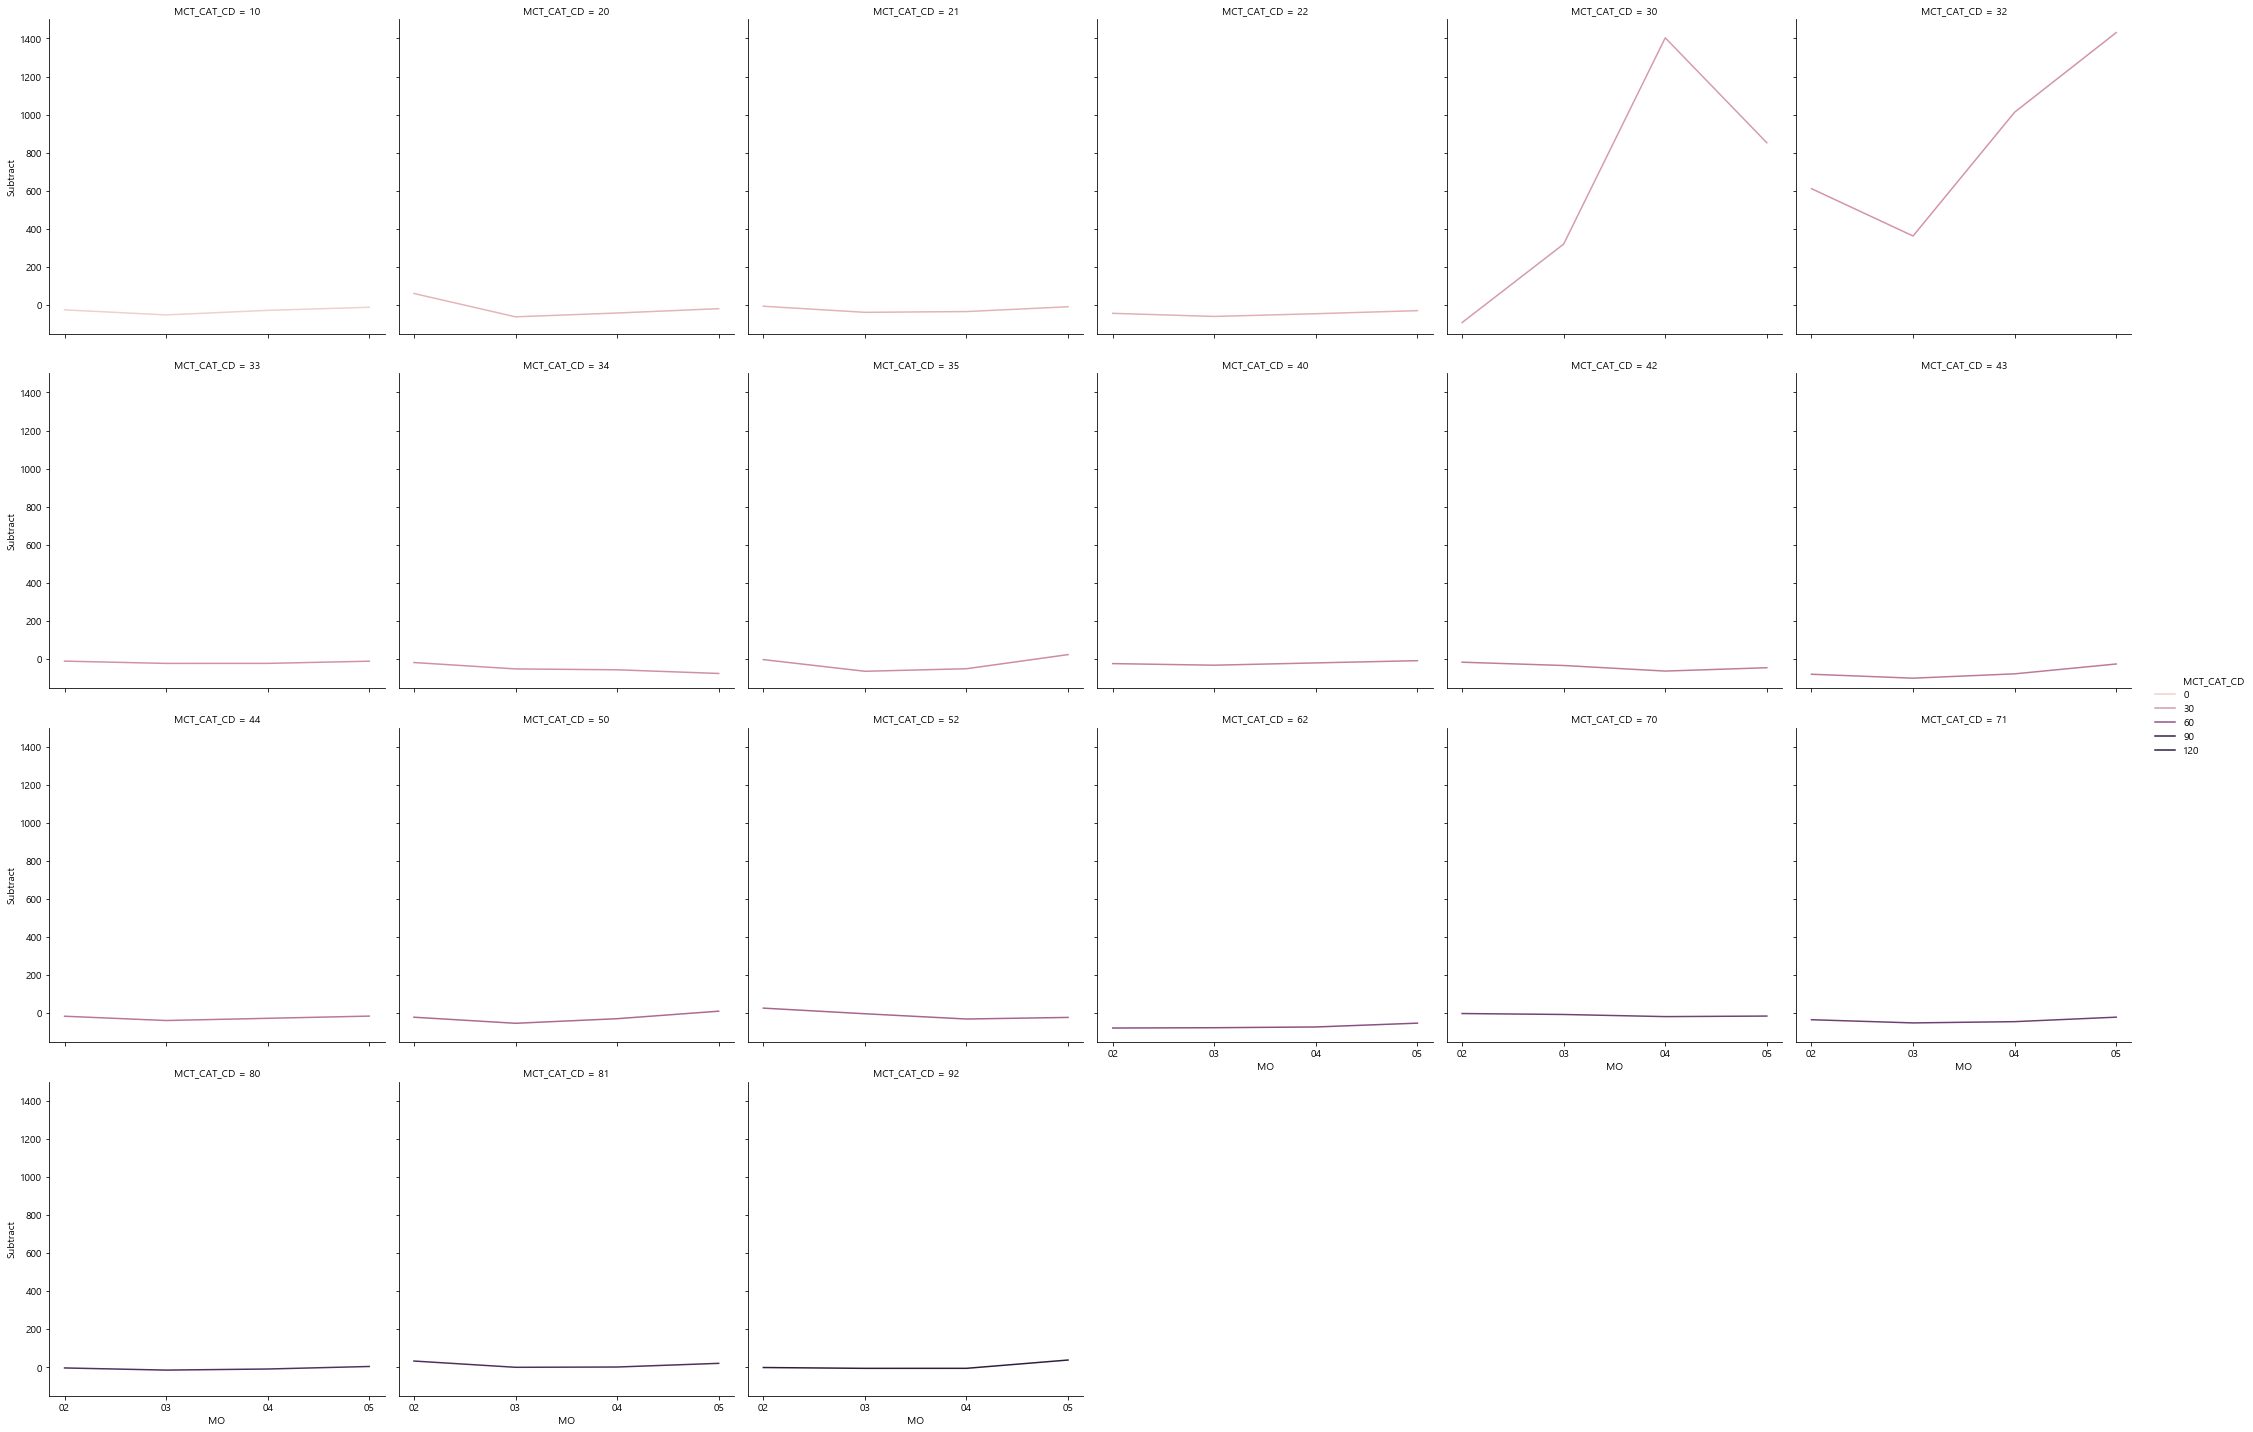

In [12]:
sns.relplot(data=df_Combi_SJ520_Result,x='MO',y='Subtract',hue='MCT_CAT_CD',kind='line',col='MCT_CAT_CD',col_wrap=6)
plt.ylim(-150,1500)

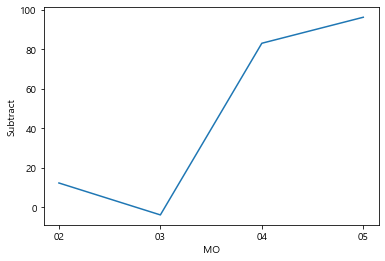

In [13]:
sns.lineplot(data=df_Combi_SJ520_Result,x='MO',y='Subtract',ci=None)

In [ ]:
#df_Combi_SJ520_Result.to_csv('Card_SJ520.csv')

### 2.2 물류데이터 정리하기

In [14]:
df_Combi2 = df_Deli.copy()
df_Combi2['DL_YM'] = df_Combi2['DL_YMD'].map(lambda x : str(x)[0:4])
df_Combi2['DL_Y'] = df_Combi2['DL_YMD'].map(lambda x : str(x)[0:2])
columns = ['DL_GD_LCLS_CD','CTGG_CD', 'HDNG_CD', 'INVC_CONT', 'DL_YM','DL_Y','DL_GD_LCLS_NM']
df_Combi2 = df_Combi2[columns]
df_Combi2

,DL_GD_LCLS_CD,CTGG_CD,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_GD_LCLS_NM
0,12,14,665,16,1902,19,도서/음반
1,10,14,615,4,1902,19,가구/인테리어
2,10,11,565,1,1902,19,가구/인테리어
3,12,11,650,6,1902,19,도서/음반
4,13,26,690,21,1902,19,디지털/가전
...,...,...,...,...,...,...,...
156566,19,26,662,22,2005,20,패션의류
156567,19,14,635,21,2005,20,패션의류
156568,20,26,662,14,2005,20,패션잡화
156569,20,35,695,25,2005,20,패션잡화


In [15]:
df_Combi2

,DL_GD_LCLS_CD,CTGG_CD,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_GD_LCLS_NM
0,12,14,665,16,1902,19,도서/음반
1,10,14,615,4,1902,19,가구/인테리어
2,10,11,565,1,1902,19,가구/인테리어
3,12,11,650,6,1902,19,도서/음반
4,13,26,690,21,1902,19,디지털/가전
...,...,...,...,...,...,...,...
156566,19,26,662,22,2005,20,패션의류
156567,19,14,635,21,2005,20,패션의류
156568,20,26,662,14,2005,20,패션잡화
156569,20,35,695,25,2005,20,패션잡화


### {{ 1. 중구 }} CTPV_CD : 14

In [48]:
df_Combi2_SJ = df_Combi2[df_Combi2['CTGG_CD']==14]
df_Combi2_SJ

,DL_GD_LCLS_CD,CTGG_CD,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_GD_LCLS_NM
0,12,14,665,16,1902,19,도서/음반
1,10,14,615,4,1902,19,가구/인테리어
5,12,14,540,25,1902,19,도서/음반
7,13,14,670,14,1902,19,디지털/가전
13,10,14,635,4,1902,19,가구/인테리어
...,...,...,...,...,...,...,...
156556,21,14,570,8,2005,20,화장품/미용
156558,20,14,580,5,2005,20,패션잡화
156561,21,14,625,15,2005,20,화장품/미용
156563,20,14,550,9,2005,20,패션잡화


#### [ 1. 520 ] : 서울 중구 소공동

In [49]:
df_Combi2_SJ520 = df_Combi2_SJ[df_Combi2_SJ['HDNG_CD']==520].copy()
df_Combi2_SJ520 

,DL_GD_LCLS_CD,CTGG_CD,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_GD_LCLS_NM
53,12,14,520,48,1902,19,도서/음반
113,10,14,520,3,1902,19,가구/인테리어
128,13,14,520,35,1902,19,디지털/가전
468,21,14,520,26,1902,19,화장품/미용
525,15,14,520,15,1902,19,생활건강
...,...,...,...,...,...,...,...
156313,15,14,520,8,2005,20,생활건강
156383,13,14,520,1,2005,20,디지털/가전
156385,19,14,520,12,2005,20,패션의류
156506,20,14,520,10,2005,20,패션잡화


In [50]:
# 해당 월마다 sum 한 것
df_Combi2_SJ520 = df_Combi2_SJ520.pivot_table(index=['DL_YM','DL_GD_LCLS_CD','DL_Y','DL_GD_LCLS_NM'],values='INVC_CONT' ,aggfunc='sum').reset_index()
df_Combi2_SJ520

,DL_YM,DL_GD_LCLS_CD,DL_Y,DL_GD_LCLS_NM,INVC_CONT
0,1902,10,19,가구/인테리어,938
1,1902,12,19,도서/음반,2907
2,1902,13,19,디지털/가전,3836
3,1902,15,19,생활건강,6141
4,1902,16,19,스포츠/레저,371
...,...,...,...,...,...
75,2005,17,20,식품,8523
76,2005,18,20,출산/육아,65
77,2005,19,20,패션의류,4605
78,2005,20,20,패션잡화,2634


* 계산식 : (df_Combi2_SJ520_20['INVC_CONT'] - df_Combi2_SJ520_19['INVC_CONT'])/ df_Combi2_SJ520_19['INVC_CONT'] * 100

In [93]:
df_Combi2_SJ520_19 = df_Combi2_SJ520[df_Combi2_SJ520['DL_Y']=='19'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ520_20 = df_Combi2_SJ520[df_Combi2_SJ520['DL_Y']=='20'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ520_Result = df_Combi2_SJ520_19.copy()
df_Combi2_SJ520_Result['M'] = df_Combi2_SJ520_Result['DL_YM'].map(lambda x : str(x)[2:4])
df_Combi2_SJ520_Result['Subtract'] = (df_Combi2_SJ520_20['INVC_CONT'] - df_Combi2_SJ520_19['INVC_CONT']) / df_Combi2_SJ520_19['INVC_CONT'] * 100
df_Combi2_SJ520_Result = df_Combi2_SJ520_Result.drop(['DL_YM','INVC_CONT'],axis=1)
df_Combi2_SJ520_Result.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
0,10,가구/인테리어,02,12.046908
1,12,도서/음반,02,20.330237
2,13,디지털/가전,02,21.220021
3,15,생활건강,02,59.534278
4,16,스포츠/레저,02,7.816712


In [94]:
df_Combi2_SJ520_Result[df_Combi2_SJ520_Result['DL_GD_LCLS_CD']==15]
## 우리는 2월 3월에 대체적으로 코로나 경각심에 따라 보다 배달을 많이 했음을 유추할 수 있다

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
3,15,생활건강,02,59.534278
13,15,생활건강,03,27.630897
23,15,생활건강,04,0.012960
33,15,생활건강,05,1.548029


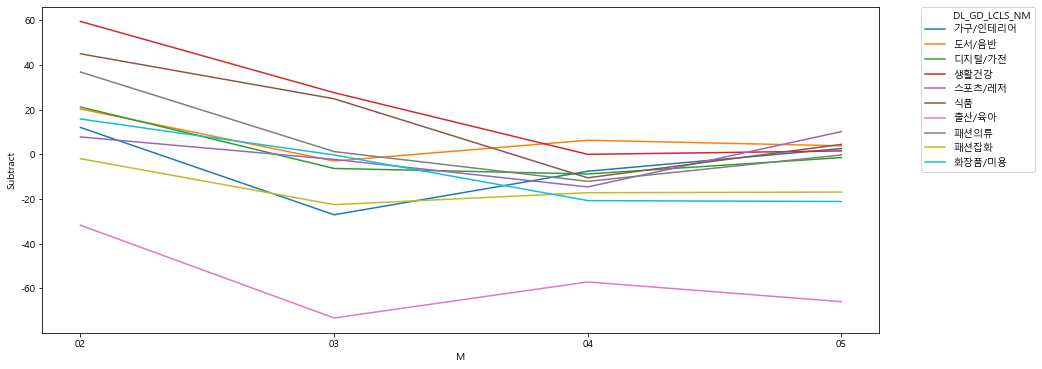

In [95]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_Combi2_SJ520_Result,x = 'M',y='Subtract',hue='DL_GD_LCLS_NM')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plt.ylim(-1000,10000)
# 제일 크게 생활 건강 쪽에서 배달을 많이 시켰음 -> 생활용품
# 식품 쪽도 많이 증가했음

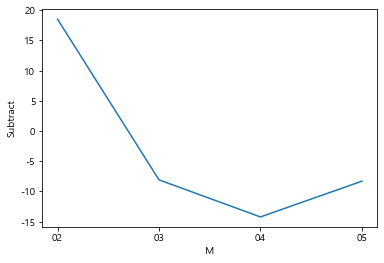

In [96]:
sns.lineplot(data = df_Combi2_SJ520_Result,x = 'M',y='Subtract',ci=None)
# 4월 중으로 감소한 경향

In [97]:
import random
random.random()
def verify (num):
    if (num==10):
        # 이것도 다시 나눠야 함
        #an = ['30','32']
        #answer= random.choice(an)
        answer=32
    elif (num==12):
        answer=50
    elif (num==13):
        answer=35
    elif (num==15):
        #an = ['50','70','40']
        #answer= random.choice(an)
        # 생활건강도 다시 나눠야 할 필요가 있음 -> 비율로 나누자는 것
        answer = 50
    elif (num==16):
        answer=21
    elif (num==17):
        # 식품은 그냥 유통업이 아닌 음료식품으로 넣었음
        answer=81
    elif (num==18):
        # 출산 육아는 없어서 그냥 93번 업종으로 따로 분류해놓음
        answer=93
    elif (num==19):
        answer=42
    elif (num==20):
        answer=44
    elif (num==21):
        answer=71
    return answer

In [98]:
df_Combi2_SJ520_Result['MCT_CAT_CD'] = df_Combi2_SJ520_Result['DL_GD_LCLS_CD'].map(lambda x : verify(x))
#df_Combi2_SJ520_Result = df_Combi2_SJ520_Result.drop('DL_GD_LCLS_NM',axis=1)
#df_Combi2_SJ520_Result.to_csv('Deli_SJ520.csv')

In [119]:
a = df_Combi2_SJ520_Result.copy()
b = a[a['DL_GD_LCLS_CD']==10].reset_index().drop('index',axis=1)
c = a[a['DL_GD_LCLS_CD']==10].reset_index().drop('index',axis=1)
d = a[a['DL_GD_LCLS_CD']==10].index
a = a.drop(d)
for i in range(0,len(b)):
    b.iloc[i,3] = b.iloc[i,3]*0.5
    b.iloc[i,4] = 30
    c.iloc[i,3] = c.iloc[i,3]*0.5
    c.iloc[i,4] = 32
a = a.append(b)
a = a.append(c)
a.astype({'MCT_CAT_CD':int})
a = a.sort_values(['MCT_CAT_CD','M']).reset_index().drop('index',axis=1)
print(a.shape)

(44, 5)


In [120]:
b = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
c = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
e = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
d = a[a['DL_GD_LCLS_CD']==15].index
a = a.drop(d)
for i in range(0,len(b)):
    b.iloc[i,3] = b.iloc[i,3]*0.5
    b.iloc[i,4] = 50
    c.iloc[i,3] = c.iloc[i,3]*0.2
    c.iloc[i,4] = 70
    e.iloc[i,3] = e.iloc[i,3]*0.3
    e.iloc[i,4] = 40
a = a.append(b)
a = a.append(c)
a = a.append(e)
a.astype({'MCT_CAT_CD':int})
print(a.shape)

(52, 5)


In [124]:
a = a.sort_values(['MCT_CAT_CD','M']).reset_index().drop('index',axis=1)
a.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,16,스포츠/레저,02,7.816712,21
1,16,스포츠/레저,03,-2.247191,21
2,16,스포츠/레저,04,-14.587738,21
3,16,스포츠/레저,05,10.204082,21
4,10,가구/인테리어,02,6.023454,30


In [205]:
df_Combi2_SJ520_Result = a.copy()
df_Combi2_SJ520_Result.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,16,스포츠/레저,02,7.816712,21
1,16,스포츠/레저,03,-2.247191,21
2,16,스포츠/레저,04,-14.587738,21
3,16,스포츠/레저,05,10.204082,21
4,10,가구/인테리어,02,6.023454,30


### 2.3 물류데이터 + 신한데이터 합치기

In [167]:
df_SJ520_Final = df_Combi_SJ520_Result.copy()
df_SJ520_Final['Deli'] = 0
df_SJ520_Final['DeliSubtract'] = 0
df_SJ520_Final.head()

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO,Deli,DeliSubtract
0,10,520,140,-25.040192,02,0,0
1,10,520,140,-51.603540,03,0,0
2,10,520,140,-27.654521,04,0,0
3,10,520,140,-11.489122,05,0,0
4,20,520,140,60.866135,02,0,0


In [168]:
deli_index = df_Combi2_SJ520_Result['MCT_CAT_CD'].unique()
df_SJ520_Final['Deli'] = df_SJ520_Final['MCT_CAT_CD'].map(lambda x: (int)(x in deli_index))

In [180]:
for i in range(0,len(df_SJ520_Final)):
    if (df_SJ520_Final.iloc[i,5]==1):
        num = df_Combi2_SJ520_Result[(df_Combi2_SJ520_Result['MCT_CAT_CD']==df_SJ520_Final.iloc[i,0])&(df_Combi2_SJ520_Result['M']==df_SJ520_Final.iloc[i,4])].iloc[0,3]
        df_SJ520_Final.iloc[i,6] = num
df_SJ520_Final.head(20)

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO,Deli,DeliSubtract
0,10,520,140,-25.040192,02,0,0.000000
1,10,520,140,-51.603540,03,0,0.000000
2,10,520,140,-27.654521,04,0,0.000000
3,10,520,140,-11.489122,05,0,0.000000
4,20,520,140,60.866135,02,0,0.000000
5,20,520,140,-61.661638,03,0,0.000000
6,20,520,140,-41.637067,04,0,0.000000
7,20,520,140,-18.859664,05,0,0.000000
8,21,520,140,-6.113241,02,1,7.816712
9,21,520,140,-38.062947,03,1,-2.247191


In [182]:
df_SJ520_Final.to_csv('df_SJ520_Final.csv')

#### [ 2. 540 ] : 서울 중구 회현동

In [270]:
df_Combi1_SJ540 = df_Combi1_SJ[df_Combi1_SJ['DONG_CD']==540]
SJ540 = df_Combi1_SJ540.pivot_table(index=['YEAR','YE_MO','MCT_CAT_CD','DONG_CD','GU_CD'],values='USE_AMT',aggfunc='sum').reset_index()
SJ540_19 = SJ540[SJ540['YEAR']=='2019']
SJ540_20 = SJ540[SJ540['YEAR']=='2020'].append({'YEAR' : '2020', 'YE_MO' : '202003','MCT_CAT_CD' : 30, 'USE_AMT' : 0 ,'DONG_CD':540,'GU_CD':140},ignore_index=True)
SJ540_20 = SJ540_20.drop(SJ540_20[(SJ540_20['YE_MO']=='202002')&(SJ540_20['MCT_CAT_CD']==60)].index)
print(SJ540_19.shape)
print(SJ540_20.shape)
# 이 둘은 잘 맞아 떨어진다

(87, 6)
(87, 6)


In [271]:
SJ540_19 = SJ540_19.sort_values(['YE_MO','MCT_CAT_CD']).reset_index().drop('index',axis=1)
SJ540_20 = SJ540_20.sort_values(['YE_MO','MCT_CAT_CD']).reset_index().drop('index',axis=1)
df_Combi_SJ540_Result= SJ540_19.drop(['YEAR','USE_AMT'],axis=1).copy()

In [276]:
df_Combi_SJ540_Result['Subtract'] = (SJ540_20['USE_AMT']-SJ540_19['USE_AMT']) / SJ540_19['USE_AMT'] * 100
df_Combi_SJ540_Result['MO']=SJ540_19['YE_MO'].map(lambda x : str(x)[4:6])
df_Combi_SJ540_Result = df_Combi_SJ540_Result.sort_values(['MCT_CAT_CD','MO']).reset_index().drop(['YE_MO','index'],axis=1)
df_Combi_SJ540_Result

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO
0,10,540,140,-9.334035,02
1,10,540,140,-51.517854,03
2,10,540,140,-60.084739,04
3,10,540,140,-24.440701,05
4,20,540,140,-28.429538,02
...,...,...,...,...,...
82,81,540,140,-14.585466,05
83,92,540,140,-14.979249,02
84,92,540,140,-23.153991,03
85,92,540,140,-23.392429,04


(-150, 1500)

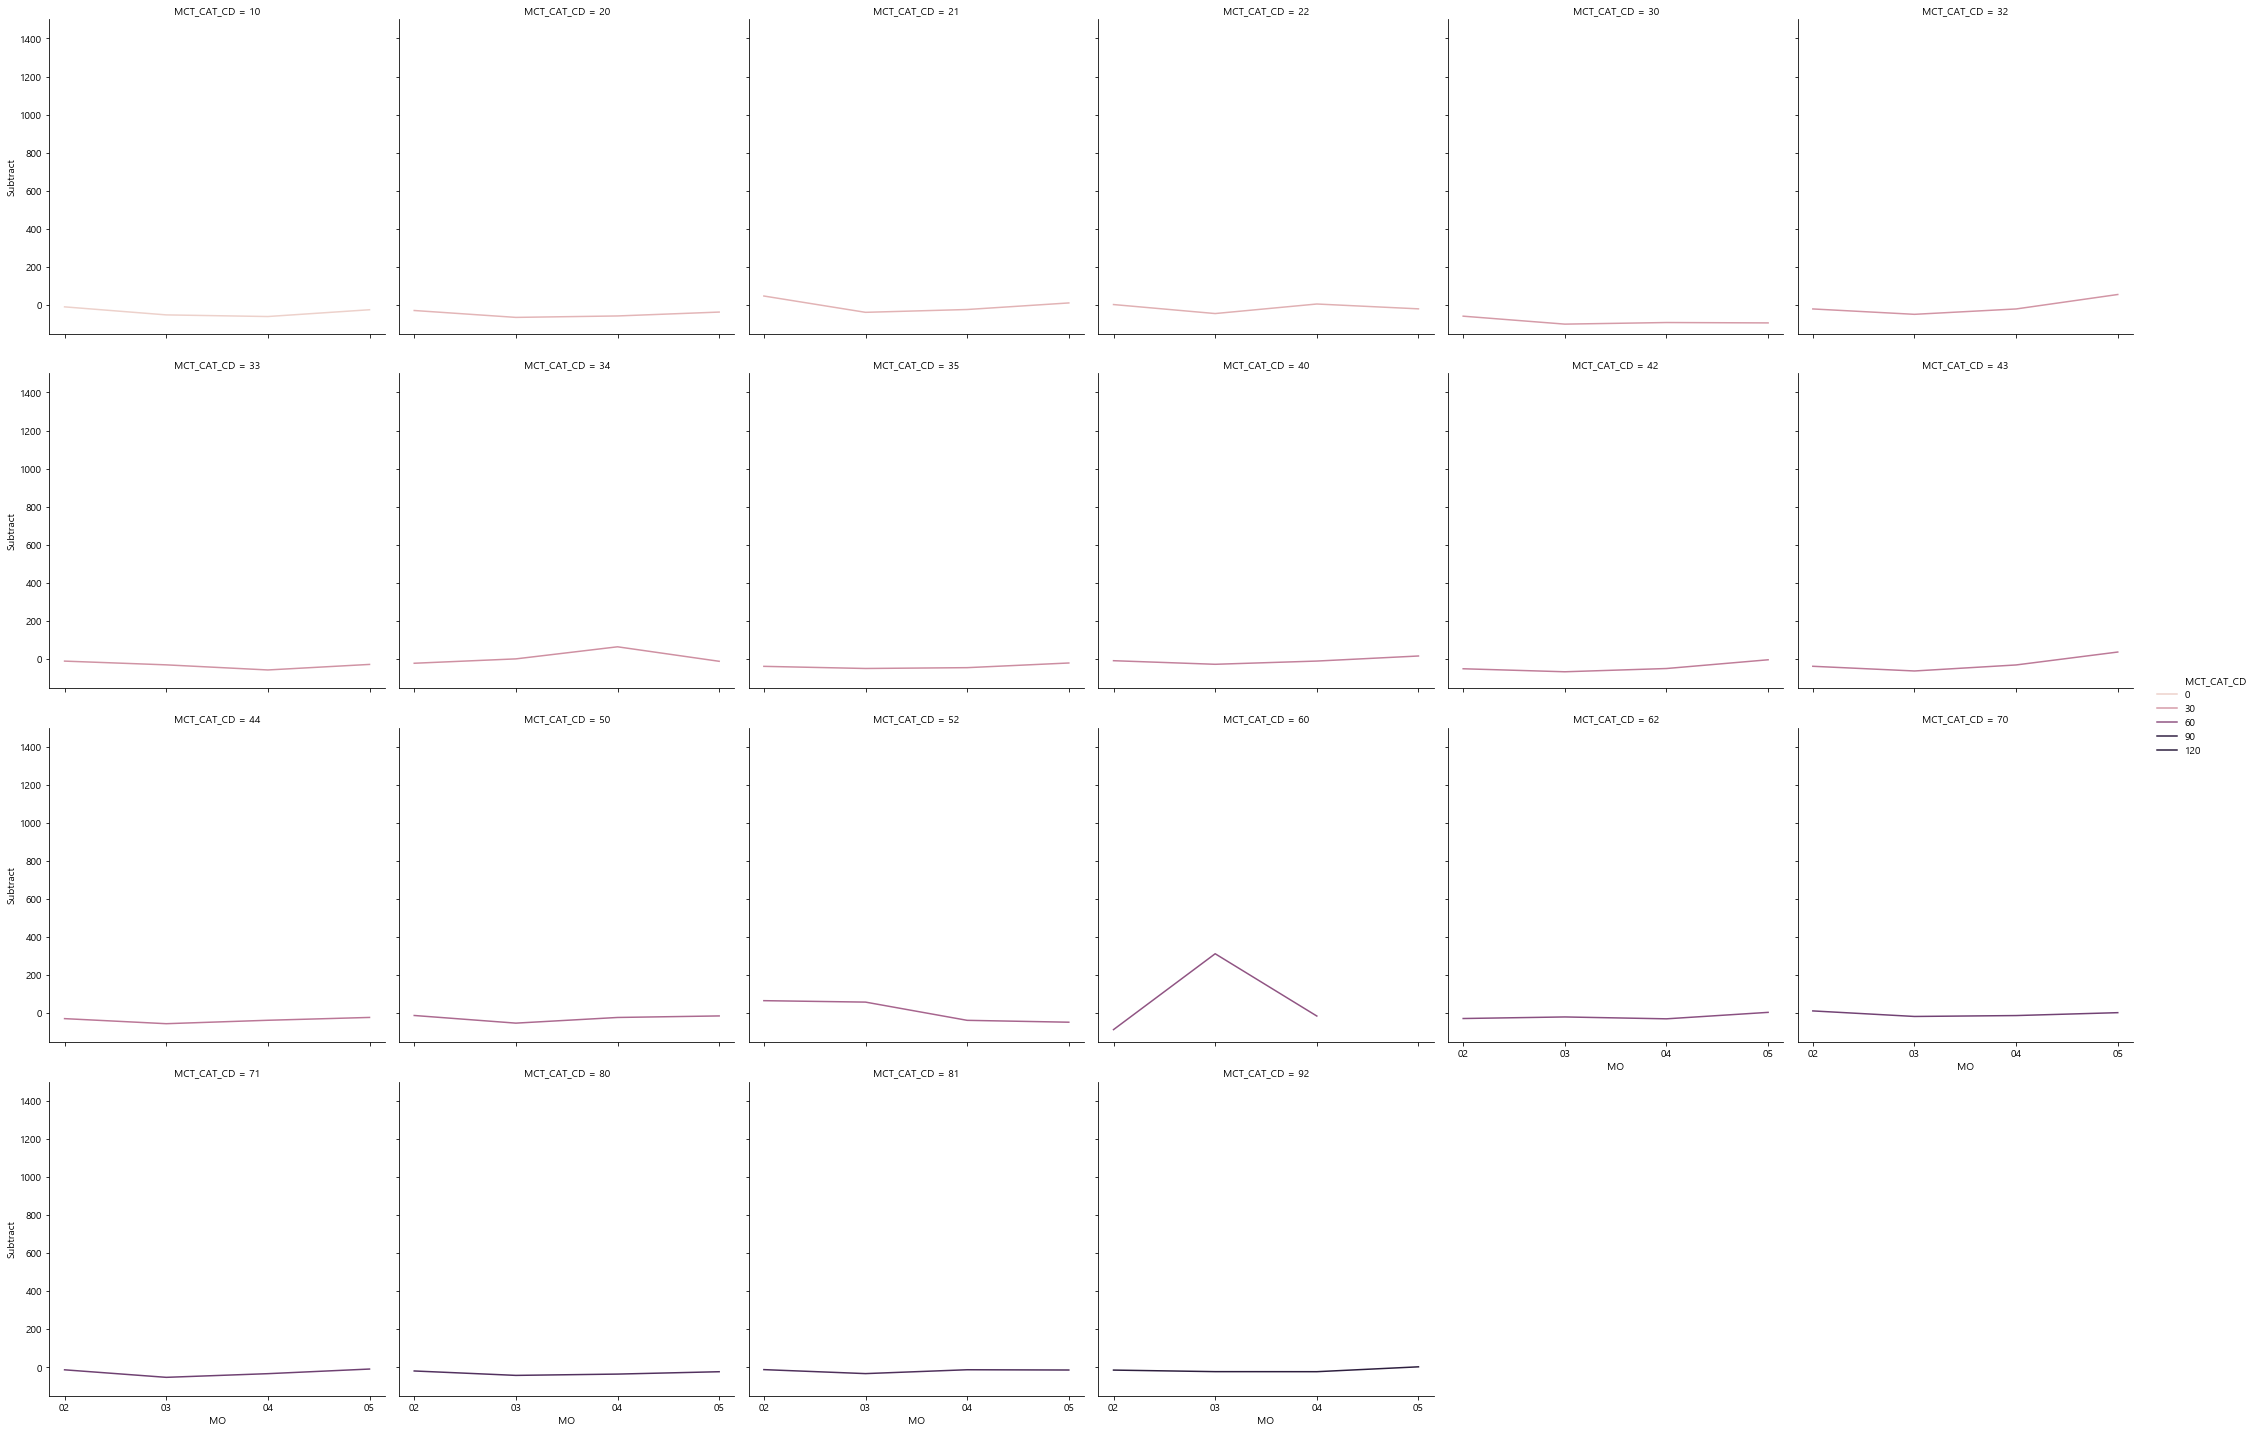

In [277]:
sns.relplot(data=df_Combi_SJ540_Result,x='MO',y='Subtract',hue='MCT_CAT_CD',kind='line',col='MCT_CAT_CD',col_wrap=6)
plt.ylim(-150,1500)

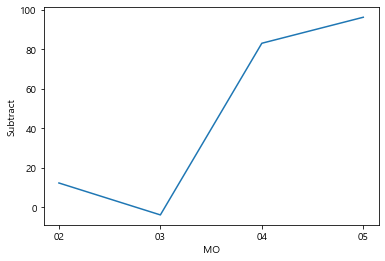

In [278]:
sns.lineplot(data=df_Combi_SJ520_Result,x='MO',y='Subtract',ci=None)

In [244]:
SJ540_19.head(40)

,YEAR,YE_MO,MCT_CAT_CD,DONG_CD,GU_CD,USE_AMT
0,2019,201902,10,540,140,1286914
1,2019,201902,20,540,140,231970
2,2019,201902,21,540,140,101429
3,2019,201902,22,540,140,118366
4,2019,201902,30,540,140,2170
5,2019,201902,32,540,140,259152
6,2019,201902,33,540,140,47242
7,2019,201902,34,540,140,241063
8,2019,201902,35,540,140,1515966
9,2019,201902,40,540,140,44310443


In [230]:
a = (SJ540_20['USE_AMT']-SJ540_19['USE_AMT']) / SJ540_19['USE_AMT'] * 100
a.head(50)

0       -9.334035
1      -28.429538
2       47.611630
3        2.785428
4      -58.248848
5      -20.278447
6      -10.401761
7      -21.645379
8      -37.884557
9       -8.234993
10     -50.566301
11     -37.557200
12     -28.614089
13     -12.081833
14      65.703947
15     -99.155646
16     -93.418928
17      38.015533
18     -50.208284
19     910.552253
20     668.384989
21     -94.380649
22      18.597154
23     -12.744455
24     -47.822242
25    6340.674467
26     -48.552220
27     -30.047142
28       1.336551
29     -49.108120
30     -27.089981
31     -66.352665
32     -62.198645
33     -55.197096
34     -52.261609
35      58.147000
36     -86.282200
37     -19.791410
38     -17.213318
39     -53.076578
40     -42.847506
41     -33.476185
42     -23.153991
43     -60.084739
44     -57.080251
45     -23.237931
46       5.642013
47     -91.611962
48     -20.316115
49     -56.858482
Name: USE_AMT, dtype: float64

In [224]:
df_Combi_SJ540_Result= SJ540_19.drop(['YEAR','USE_AMT'],axis=1).copy()
df_Combi_SJ540_Result['Subtract'] = (SJ540_20['USE_AMT']-SJ540_19['USE_AMT']) / SJ540_19['USE_AMT'] * 100
df_Combi_SJ540_Result['MO']=SJ540_19['YE_MO'].map(lambda x : str(x)[4:6])

In [225]:
df_Combi_SJ540_Result

,YE_MO,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO
0,201902,10,540,140,NaN,02
1,201902,20,540,140,NaN,02
2,201902,21,540,140,NaN,02
3,201902,22,540,140,NaN,02
4,201902,30,540,140,NaN,02
...,...,...,...,...,...,...
82,201905,70,540,140,NaN,05
83,201905,71,540,140,NaN,05
84,201905,80,540,140,NaN,05
85,201905,81,540,140,NaN,05


#### [ 2. 540 ] : 서울 중구 회현동 : 물류데이터

In [279]:
df_Combi2_SJ540 = df_Combi2_SJ[df_Combi2_SJ['HDNG_CD']==540].copy()
df_Combi2_SJ540 = df_Combi2_SJ540.pivot_table(index=['DL_YM','DL_GD_LCLS_CD','DL_Y','DL_GD_LCLS_NM'],values='INVC_CONT' ,aggfunc='sum').reset_index()
df_Combi2_SJ540

,DL_YM,DL_GD_LCLS_CD,DL_Y,DL_GD_LCLS_NM,INVC_CONT
0,1902,10,19,가구/인테리어,910
1,1902,12,19,도서/음반,1795
2,1902,13,19,디지털/가전,3192
3,1902,15,19,생활건강,6365
4,1902,16,19,스포츠/레저,319
...,...,...,...,...,...
75,2005,17,20,식품,9486
76,2005,18,20,출산/육아,101
77,2005,19,20,패션의류,5050
78,2005,20,20,패션잡화,3239


In [282]:
df_Combi2_SJ540_19 = df_Combi2_SJ540[df_Combi2_SJ540['DL_Y']=='19'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ540_20 = df_Combi2_SJ540[df_Combi2_SJ540['DL_Y']=='20'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ540_Result = df_Combi2_SJ540_19.copy()
df_Combi2_SJ540_Result['M'] = df_Combi2_SJ540_Result['DL_YM'].map(lambda x : str(x)[2:4])
df_Combi2_SJ540_Result['Subtract'] = (df_Combi2_SJ540_20['INVC_CONT'] - df_Combi2_SJ540_19['INVC_CONT']) / df_Combi2_SJ540_19['INVC_CONT'] * 100
df_Combi2_SJ540_Result = df_Combi2_SJ540_Result.drop(['DL_YM','INVC_CONT'],axis=1)
df_Combi2_SJ540_Result.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
0,10,가구/인테리어,02,18.351648
1,12,도서/음반,02,24.345404
2,13,디지털/가전,02,23.088972
3,15,생활건강,02,47.038492
4,16,스포츠/레저,02,24.137931


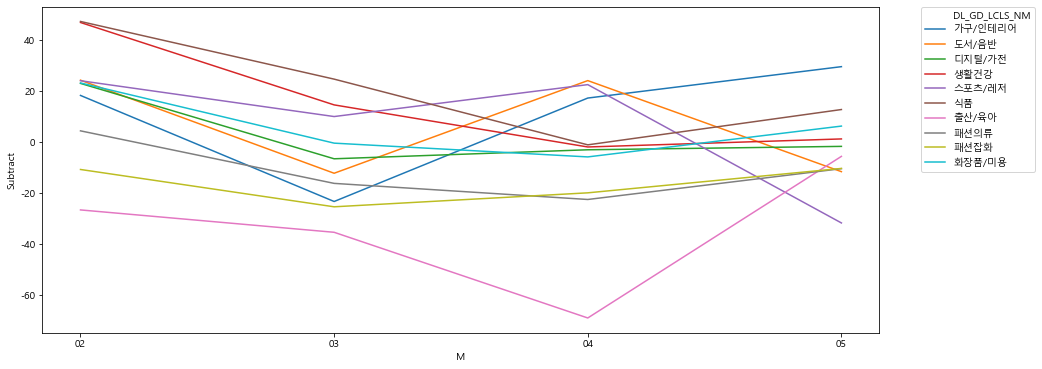

In [283]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_Combi2_SJ540_Result,x = 'M',y='Subtract',hue='DL_GD_LCLS_NM')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
# 출산 육아는 배달 데이터가 감소했다

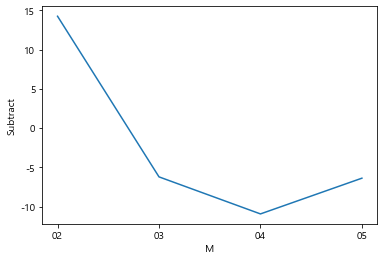

In [284]:
sns.lineplot(data = df_Combi2_SJ520_Result,x = 'M',y='Subtract',ci=None)

In [285]:
df_Combi2_SJ540_Result['MCT_CAT_CD'] = df_Combi2_SJ540_Result['DL_GD_LCLS_CD'].map(lambda x : verify(x))
a = df_Combi2_SJ540_Result.copy()
b = a[a['DL_GD_LCLS_CD']==10].reset_index().drop('index',axis=1)
c = a[a['DL_GD_LCLS_CD']==10].reset_index().drop('index',axis=1)
d = a[a['DL_GD_LCLS_CD']==10].index
a = a.drop(d)
for i in range(0,len(b)):
    b.iloc[i,3] = b.iloc[i,3]*0.5
    b.iloc[i,4] = 30
    c.iloc[i,3] = c.iloc[i,3]*0.5
    c.iloc[i,4] = 32
a = a.append(b)
a = a.append(c)
a.astype({'MCT_CAT_CD':int})
a = a.sort_values(['MCT_CAT_CD','M']).reset_index().drop('index',axis=1)
print(a.shape)

(44, 5)


In [286]:
b = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
c = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
e = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
d = a[a['DL_GD_LCLS_CD']==15].index
a = a.drop(d)
for i in range(0,len(b)):
    b.iloc[i,3] = b.iloc[i,3]*0.5
    b.iloc[i,4] = 50
    c.iloc[i,3] = c.iloc[i,3]*0.2
    c.iloc[i,4] = 70
    e.iloc[i,3] = e.iloc[i,3]*0.3
    e.iloc[i,4] = 40
a = a.append(b)
a = a.append(c)
a = a.append(e)
a.astype({'MCT_CAT_CD':int})
print(a.shape)

(52, 5)


In [287]:
a = a.sort_values(['MCT_CAT_CD','M']).reset_index().drop('index',axis=1)
a.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,16,스포츠/레저,02,24.137931,21
1,16,스포츠/레저,03,10.050251,21
2,16,스포츠/레저,04,22.602740,21
3,16,스포츠/레저,05,-31.786942,21
4,10,가구/인테리어,02,9.175824,30


In [288]:
df_Combi2_SJ540_Result = a.copy()
df_Combi2_SJ540_Result.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,16,스포츠/레저,02,24.137931,21
1,16,스포츠/레저,03,10.050251,21
2,16,스포츠/레저,04,22.602740,21
3,16,스포츠/레저,05,-31.786942,21
4,10,가구/인테리어,02,9.175824,30


In [290]:
df_SJ540_Final = df_Combi_SJ540_Result.copy()
df_SJ540_Final['Deli'] = 0
df_SJ540_Final['DeliSubtract'] = 0
deli_index = df_Combi2_SJ540_Result['MCT_CAT_CD'].unique()
df_SJ540_Final['Deli'] = df_SJ540_Final['MCT_CAT_CD'].map(lambda x: (int)(x in deli_index))
for i in range(0,len(df_SJ540_Final)):
    if (df_SJ540_Final.iloc[i,5]==1):
        num = df_Combi2_SJ540_Result[(df_Combi2_SJ540_Result['MCT_CAT_CD']==df_SJ540_Final.iloc[i,0])&(df_Combi2_SJ540_Result['M']==df_SJ540_Final.iloc[i,4])].iloc[0,3]
        df_SJ540_Final.iloc[i,6] = num
df_SJ540_Final.head(20)

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO,Deli,DeliSubtract
0,10,540,140,-9.334035,02,0,0.000000
1,10,540,140,-51.517854,03,0,0.000000
2,10,540,140,-60.084739,04,0,0.000000
3,10,540,140,-24.440701,05,0,0.000000
4,20,540,140,-28.429538,02,0,0.000000
5,20,540,140,-64.648189,03,0,0.000000
6,20,540,140,-57.080251,04,0,0.000000
7,20,540,140,-36.700608,05,0,0.000000
8,21,540,140,47.611630,02,1,24.137931
9,21,540,140,-38.048725,03,1,10.050251


In [291]:
df_SJ540_Final.to_csv('df_SJ540_Final.csv')

#### [ 3. 540 ] : 서울 중구 명동

In [292]:
df_Combi1_SJ550 = df_Combi1_SJ[df_Combi1_SJ['DONG_CD']==550]
SJ550 = df_Combi1_SJ550.pivot_table(index=['YEAR','YE_MO','MCT_CAT_CD','DONG_CD','GU_CD'],values='USE_AMT',aggfunc='sum').reset_index()
SJ550_19 = SJ550[SJ550['YEAR']=='2019']
SJ550_20 = SJ550[SJ550['YEAR']=='2020']
print(SJ550_19.shape)
print(SJ550_20.shape)

(80, 6)
(80, 6)


In [330]:
SJ550_20 = SJ550_20.sort_values(['YE_MO','MCT_CAT_CD']).reset_index().drop('index',axis=1)
df_Combi_SJ550_Result= SJ550_19.drop(['YEAR','USE_AMT'],axis=1).copy()
df_Combi_SJ550_Result['Subtract'] = (SJ550_20['USE_AMT']-SJ550_19['USE_AMT']) / SJ550_19['USE_AMT'] * 100
df_Combi_SJ550_Result['MO']=SJ550_19['YE_MO'].map(lambda x : str(x)[4:6])
df_Combi_SJ550_Result = df_Combi_SJ550_Result.sort_values(['MCT_CAT_CD','MO']).reset_index().drop(['YE_MO','index'],axis=1)
df_Combi_SJ550_Result.head(20)

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO
0,10,550,140,-59.038254,02
1,10,550,140,-76.760256,03
2,10,550,140,-67.015917,04
3,10,550,140,-63.639559,05
4,20,550,140,-34.091802,02
5,20,550,140,-40.284764,03
6,20,550,140,-12.516913,04
7,20,550,140,16.785966,05
8,21,550,140,12.600425,02
9,21,550,140,-33.230778,03


In [328]:
df_Combi_SJ550_Result.head(20)

,YE_MO,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO
0,201902,10,550,140,-59.038254,02
1,201902,20,550,140,-34.091802,02
2,201902,21,550,140,12.600425,02
3,201902,22,550,140,-75.228601,02
4,201902,32,550,140,118.138512,02
5,201902,33,550,140,-42.860115,02
6,201902,34,550,140,-14.899795,02
7,201902,35,550,140,-11.318251,02
8,201902,40,550,140,-21.729675,02
9,201902,42,550,140,-60.044407,02


(-150, 1500)

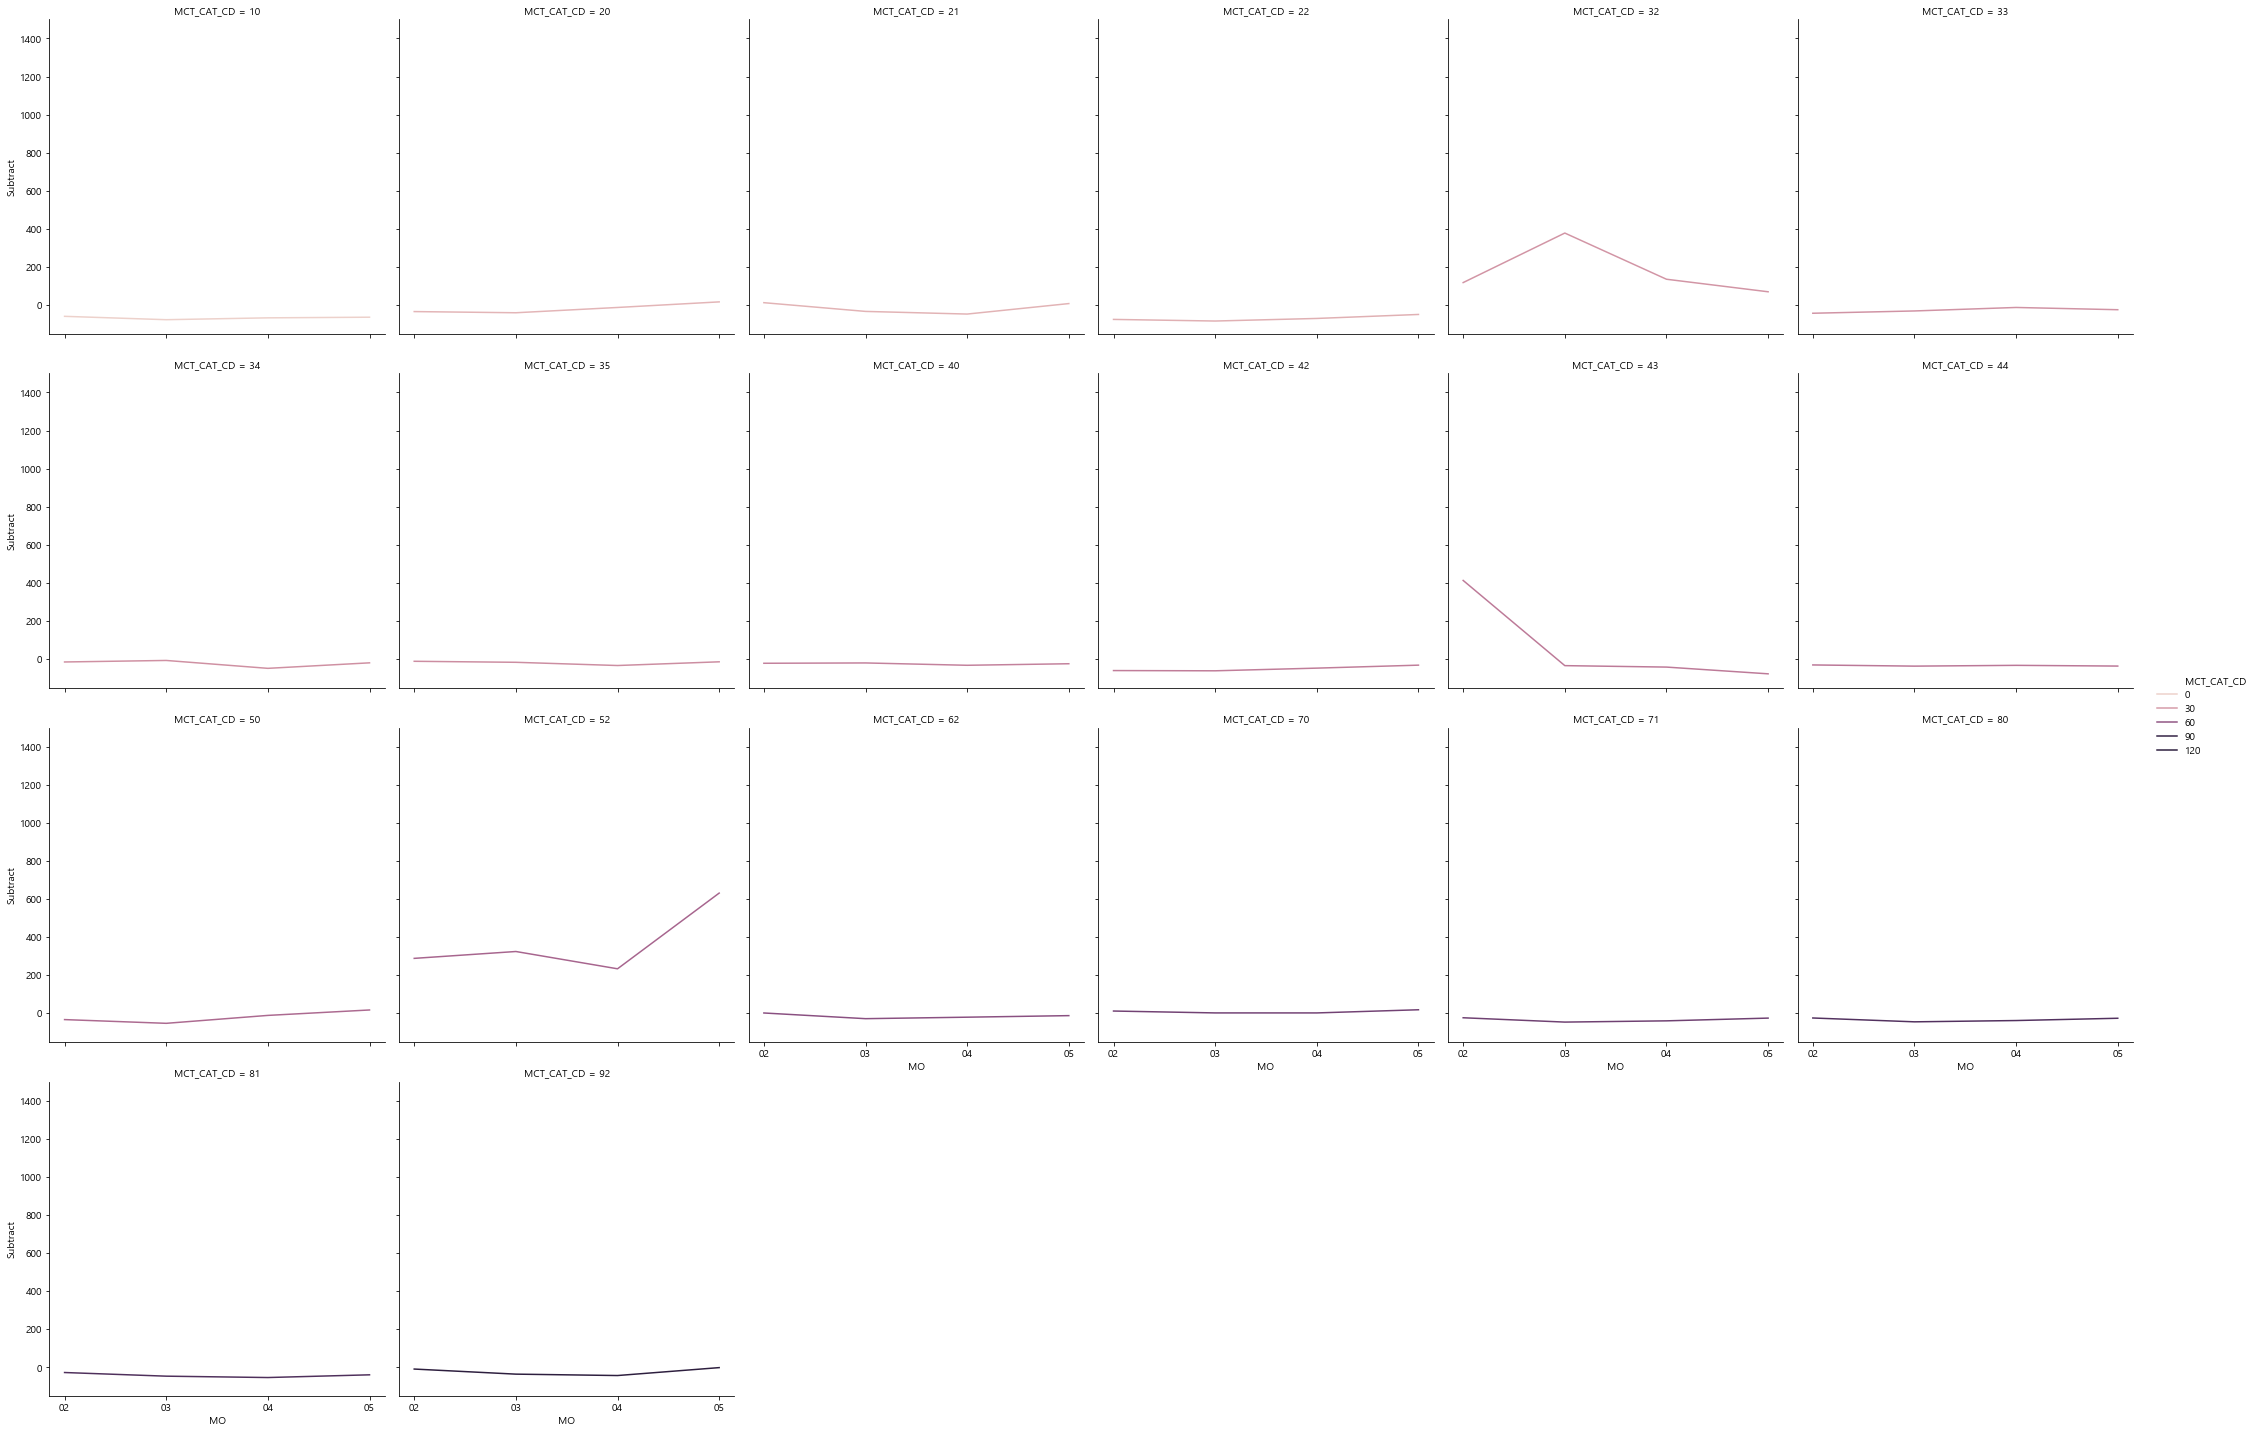

In [299]:
sns.relplot(data=df_Combi_SJ550_Result,x='MO',y='Subtract',hue='MCT_CAT_CD',kind='line',col='MCT_CAT_CD',col_wrap=6)
plt.ylim(-150,1500)

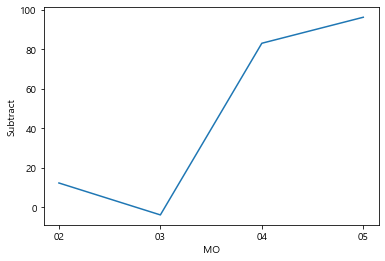

In [303]:
sns.lineplot(data=df_Combi_SJ520_Result,x='MO',y='Subtract',ci=None)

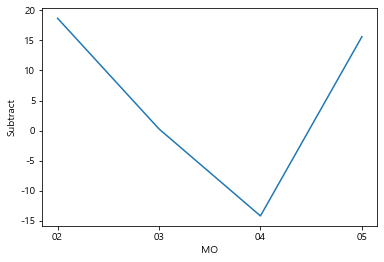

In [304]:
sns.lineplot(data=df_Combi_SJ550_Result,x='MO',y='Subtract',ci=None)
# 550 은 좀 다른 결과가 있는 것같다

#### [ 1. 550 ] : 서울 중구 명동 : 물류데이터

In [305]:
df_Combi2_SJ550 = df_Combi2_SJ[df_Combi2_SJ['HDNG_CD']==550].copy()
df_Combi2_SJ550 = df_Combi2_SJ550.pivot_table(index=['DL_YM','DL_GD_LCLS_CD','DL_Y','DL_GD_LCLS_NM'],values='INVC_CONT' ,aggfunc='sum').reset_index()
df_Combi2_SJ550_19 = df_Combi2_SJ550[df_Combi2_SJ520['DL_Y']=='19'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ550_20 = df_Combi2_SJ550[df_Combi2_SJ520['DL_Y']=='20'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ550_Result = df_Combi2_SJ550_19.copy()
df_Combi2_SJ550_Result['M'] = df_Combi2_SJ550_Result['DL_YM'].map(lambda x : str(x)[2:4])
df_Combi2_SJ550_Result['Subtract'] = (df_Combi2_SJ550_20['INVC_CONT'] - df_Combi2_SJ550_19['INVC_CONT']) / df_Combi2_SJ550_19['INVC_CONT'] * 100
df_Combi2_SJ550_Result = df_Combi2_SJ550_Result.drop(['DL_YM','INVC_CONT'],axis=1)
df_Combi2_SJ550_Result.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
0,10,가구/인테리어,02,10.591133
1,12,도서/음반,02,29.846504
2,13,디지털/가전,02,22.134670
3,15,생활건강,02,73.997551
4,16,스포츠/레저,02,-6.388206


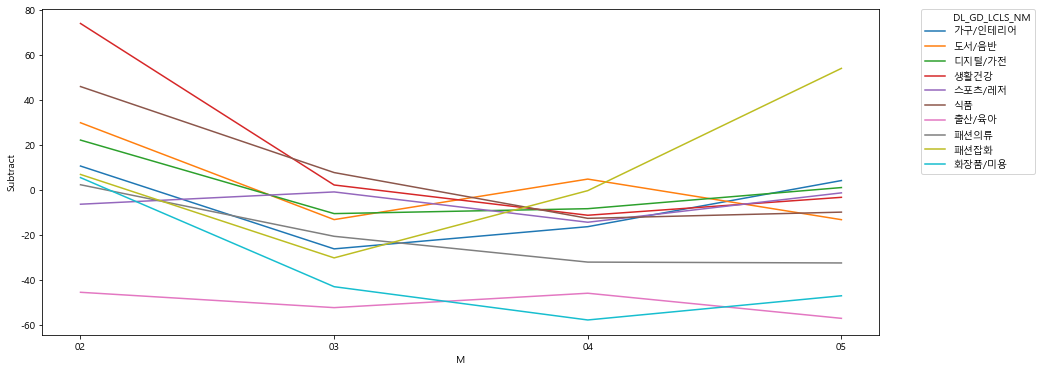

In [307]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_Combi2_SJ550_Result,x = 'M',y='Subtract',hue='DL_GD_LCLS_NM')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

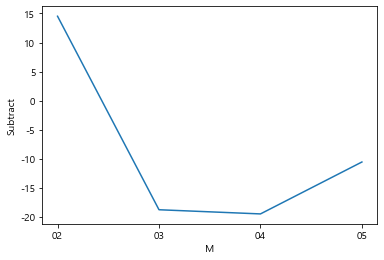

In [308]:
sns.lineplot(data = df_Combi2_SJ550_Result,x = 'M',y='Subtract',ci=None)

In [309]:
df_Combi2_SJ550_Result['MCT_CAT_CD'] = df_Combi2_SJ550_Result['DL_GD_LCLS_CD'].map(lambda x : verify(x))
a = df_Combi2_SJ550_Result.copy()
b = a[a['DL_GD_LCLS_CD']==10].reset_index().drop('index',axis=1)
c = a[a['DL_GD_LCLS_CD']==10].reset_index().drop('index',axis=1)
d = a[a['DL_GD_LCLS_CD']==10].index
a = a.drop(d)
for i in range(0,len(b)):
    b.iloc[i,3] = b.iloc[i,3]*0.5
    b.iloc[i,4] = 30
    c.iloc[i,3] = c.iloc[i,3]*0.5
    c.iloc[i,4] = 32
a = a.append(b)
a = a.append(c)
a.astype({'MCT_CAT_CD':int})
a = a.sort_values(['MCT_CAT_CD','M']).reset_index().drop('index',axis=1)
print(a.shape)
b = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
c = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
e = a[a['DL_GD_LCLS_CD']==15].reset_index().drop('index',axis=1)
d = a[a['DL_GD_LCLS_CD']==15].index
a = a.drop(d)
for i in range(0,len(b)):
    b.iloc[i,3] = b.iloc[i,3]*0.5
    b.iloc[i,4] = 50
    c.iloc[i,3] = c.iloc[i,3]*0.2
    c.iloc[i,4] = 70
    e.iloc[i,3] = e.iloc[i,3]*0.3
    e.iloc[i,4] = 40
a = a.append(b)
a = a.append(c)
a = a.append(e)
a.astype({'MCT_CAT_CD':int})
print(a.shape)

(44, 5)
(52, 5)


In [310]:
a = a.sort_values(['MCT_CAT_CD','M']).reset_index().drop('index',axis=1)
a.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,16,스포츠/레저,02,-6.388206,21
1,16,스포츠/레저,03,-0.923788,21
2,16,스포츠/레저,04,-14.401623,21
3,16,스포츠/레저,05,-1.338432,21
4,10,가구/인테리어,02,5.295567,30


In [311]:
df_Combi2_SJ550_Result = a.copy()
df_Combi2_SJ550_Result.head()

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,16,스포츠/레저,02,-6.388206,21
1,16,스포츠/레저,03,-0.923788,21
2,16,스포츠/레저,04,-14.401623,21
3,16,스포츠/레저,05,-1.338432,21
4,10,가구/인테리어,02,5.295567,30


In [312]:
df_SJ550_Final = df_Combi_SJ550_Result.copy()
df_SJ550_Final['Deli'] = 0
df_SJ550_Final['DeliSubtract'] = 0
df_SJ550_Final.head()

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO,Deli,DeliSubtract
0,10,550,140,-59.038254,02,0,0
1,10,550,140,-76.760256,03,0,0
2,10,550,140,-67.015917,04,0,0
3,10,550,140,-63.639559,05,0,0
4,20,550,140,-34.091802,02,0,0


In [324]:
df_SJ550_Final.head(20)

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO,Deli,DeliSubtract
0,10,550,140,-59.038254,02,0,0.000000
1,10,550,140,-76.760256,03,0,0.000000
2,10,550,140,-67.015917,04,0,0.000000
3,10,550,140,-63.639559,05,0,0.000000
4,20,550,140,-34.091802,02,0,0.000000
5,20,550,140,-40.284764,03,0,0.000000
6,20,550,140,-12.516913,04,0,0.000000
7,20,550,140,16.785966,05,0,0.000000
8,21,550,140,12.600425,02,1,-6.388206
9,21,550,140,-33.230778,03,1,-0.923788


In [313]:
deli_index = df_Combi2_SJ550_Result['MCT_CAT_CD'].unique()
df_SJ550_Final['Deli'] = df_SJ550_Final['MCT_CAT_CD'].map(lambda x: (int)(x in deli_index))
for i in range(0,len(df_SJ550_Final)):
    if (df_SJ550_Final.iloc[i,5]==1):
        num = df_Combi2_SJ550_Result[(df_Combi2_SJ550_Result['MCT_CAT_CD']==df_SJ550_Final.iloc[i,0])&(df_Combi2_SJ550_Result['M']==df_SJ550_Final.iloc[i,4])].iloc[0,3]
        df_SJ550_Final.iloc[i,6] = num
df_SJ550_Final.head(20)

,MCT_CAT_CD,DONG_CD,GU_CD,Subtract,MO,Deli,DeliSubtract
0,10,550,140,-59.038254,02,0,0.000000
1,10,550,140,-76.760256,03,0,0.000000
2,10,550,140,-67.015917,04,0,0.000000
3,10,550,140,-63.639559,05,0,0.000000
4,20,550,140,-34.091802,02,0,0.000000
5,20,550,140,-40.284764,03,0,0.000000
6,20,550,140,-12.516913,04,0,0.000000
7,20,550,140,16.785966,05,0,0.000000
8,21,550,140,12.600425,02,1,-6.388206
9,21,550,140,-33.230778,03,1,-0.923788


In [314]:
df_SJ550_Final.to_csv('df_SJ550_Final.csv')